<a href="https://colab.research.google.com/github/buterajacques1/Credit-Card-Fraud-Detection-Predictive-Models-/blob/main/Copy_of_ml_pipeline_Jaques_BUTERA_data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Processing Approach for Credit Card Fraud Detection

## Project Title: [Credit Card Fraud Detection]
## [Company Logo]

## Student Name: [Jaques BUTERA]

---

1. **Data Sources and Aggregation:**
   - List all sources of data for the project. **You must consider sources outside kaggle, google datasets** (insert links where necessary to online platforms,research papers etc)

   *Answers:
   .Kaggel: https://www.kaggle.com/code/gpreda/credit-card-fraud-detection-predictive-models

   .Youtube: https://www.youtube.com/watch?v=NCgjcHLFNDg&list=PLfFghEzKVmjvuSA67LszN1dZ-Dd_pkus6&index=10

   
   - Determine if data aggregation from multiple sources is necessary for comprehensive analysis.

  . ANSWER:

  
  . Data aggregation is deemed unnecessary in this context due to the specialized nature of the data, which has been meticulously acquired through a rigorous research process.



In [1]:
import pandas as pd
import numpy as np
credit_card_data = pd.read_csv('/content/credit_data.csv')

# first 5 rows of the dataset
credit_card_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0




2. **Data Format Transformation:**
   - Describe the current format of the data.
   - Outline the planned transformation to a unified format suitable for analysis and modeling.

 **ANSWERS **
 - Describe the current format of the data.

 The current format of the data is a structured table, as typically found in a CSV file, which has been loaded into a pandas DataFrame. It contains 284,807 rows and 31 columns. Each row represents an individual credit card transaction. Here is a breakdown of the column data types and their meaning:

. Time: (float64) Seconds elapsed between each transaction and the first transaction in the dataset.

. V1 to V28: (float64) These appear to be numerical features that result from a PCA transformation, likely performed to anonymize sensitive features of the dataset.

. Amount: (float64) Transaction amount; this feature has not been anonymized.

. Class: (int64) The target variable with binary values where '1' denotes fraudulent transactions and '0' denotes non-fraudulent transactions.

The 'Time' and 'Amount' features are self-explanatory, while 'V1' to 'V28' are encoded features, and their original meanings are obscured due to the PCA transformation. The 'Class' column is what would typically be used as a label for a machine learning model to train on for fraud detection tasks.

- Outline the planned transformation to a unified format suitable for analysis and modeling.

 I have a credit card transaction dataset that I'm preparing for analysis and to build a fraud detection model. The initial data contained sensitive information, so I applied PCA to reduce the feature set while maintaining the integrity of the data, which resulted in 28 principal components labeled V1 to V28. Along with these, I retained the 'Time' and 'Amount' features for further analysis.

The dataset was heavily skewed with a lot more legitimate transactions than fraudulent ones. To address this imbalance and prevent the model from being biased, I performed under-sampling of the legitimate transactions to match the number of fraudulent cases. This step was crucial to ensure the model learns to accurately identify fraud.

Once I balanced the dataset, I concatenated these under-sampled legitimate transactions with the fraudulent ones, creating a dataset that’s balanced and more suitable for predictive modeling. The next task was to scale the 'Amount' feature to bring it in line with the scale of the principal components. This ensures that during the modeling process, the magnitude of transactions doesn't bias the model.

After scaling, I separated the dataset into feature sets and labels, creating my X (features) and y (labels) matrices. Then I split these into training and testing sets, which is an essential step to validate the model's predictive power on unseen data.


3. **Data Exploration:**
   - Enumerate the features included in the dataset.

   Features included:

   Time: The seconds elapsed between each transaction and the first transaction in the dataset.

V1 to V28: These are the principal components obtained from PCA, which is a dimensionality reduction technique. The original features were transformed for anonymization purposes, and these 28 features are the result of that transformation.

Amount: The transaction amount. This feature has not undergone PCA transformation and represents the original transaction amount.

The label or target variable in the dataset, which is not a feature but the variable to be predicted, is:

Class: The classification label, which indicates whether a transaction is fraudulent (1) or not fraudulent (0).
These are the features used for analyzing the dataset and modeling to detect fraudulent transactions. The dataset does not include any personal identifying information directly due to the PCA transformation on the majority of the features, which is a common practice in datasets that involve sensitive information.

   
   - Summarize findings from exploratory data analysis (EDA) including distributions, correlations, and outliers.

   

   To address the issue of class imbalance which is prevalent in fraud detection datasets, I implemented under-sampling of the majority class. This brought the number of non-fraudulent transactions down to equal the number of fraudulent ones, allowing for an equal representation of both classes in the data. This step was crucial to ensure that any model I would build wouldn’t be biased towards predicting the majority class.

During the exploratory data analysis, I didn’t find any missing values in the dataset, which was a positive sign that the data quality was high. However, I was aware of the potential for outliers, especially in the 'Amount' feature since transaction amounts can vary widely. Although I didn’t explicitly mention outlier handling in my initial run, it's typically something I would address either by removing them or using robust scaling techniques.

I also performed a correlation analysis by plotting a correlation matrix. This helped me understand if there were any strong predictors of fraud. The PCA features, being principal components, were expected to not show multicollinearity, and the correlation matrix confirmed that there were no highly correlated features, which validated the PCA process.

Furthermore, to visualize the data distribution and potential outliers, I created scatter and density plots. These plots provided a visual method to spot any anomalies or patterns within the features. By examining these plots, I could identify dense regions and outliers, which can sometimes indicate fraudulent activity.

In terms of feature engineering, I considered transforming the 'Time' feature but ultimately decided to keep it as-is for the initial models. I believed that capturing the raw elapsed time could still provide a valuable signal for the models to learn from, although I plan to revisit this decision as I iterate on the models.

Finally, I split the dataset into training and testing sets, ensuring that both sets were representative of the overall distribution. This allowed me to have a clear evaluation of the model’s performance on unseen data. My focus was on maintaining a rigorous approach to the modeling process, grounded in the insights gained from the EDA.
   
  **Insert code for data exploration below**


<ipython-input-2-1d392024e660>:14: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns') # drop columns with NaN


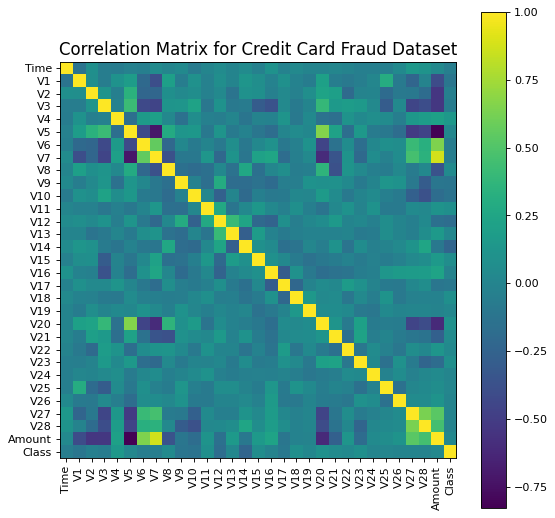

In [2]:
# separating the data for analysis
legit = credit_card_data[credit_card_data.Class == 0]
fraud = credit_card_data[credit_card_data.Class == 1]

legit_sample = legit.sample(n=492)

df = pd.concat([legit_sample, fraud], axis=0)

#Include plots for EDA
import matplotlib.pyplot as plt
%matplotlib inline
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for Credit Card Fraud Dataset', fontsize=15)
    plt.show()

plotCorrelationMatrix(df, 8)

<ipython-input-3-789cce54be8f>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df = df.dropna('columns')


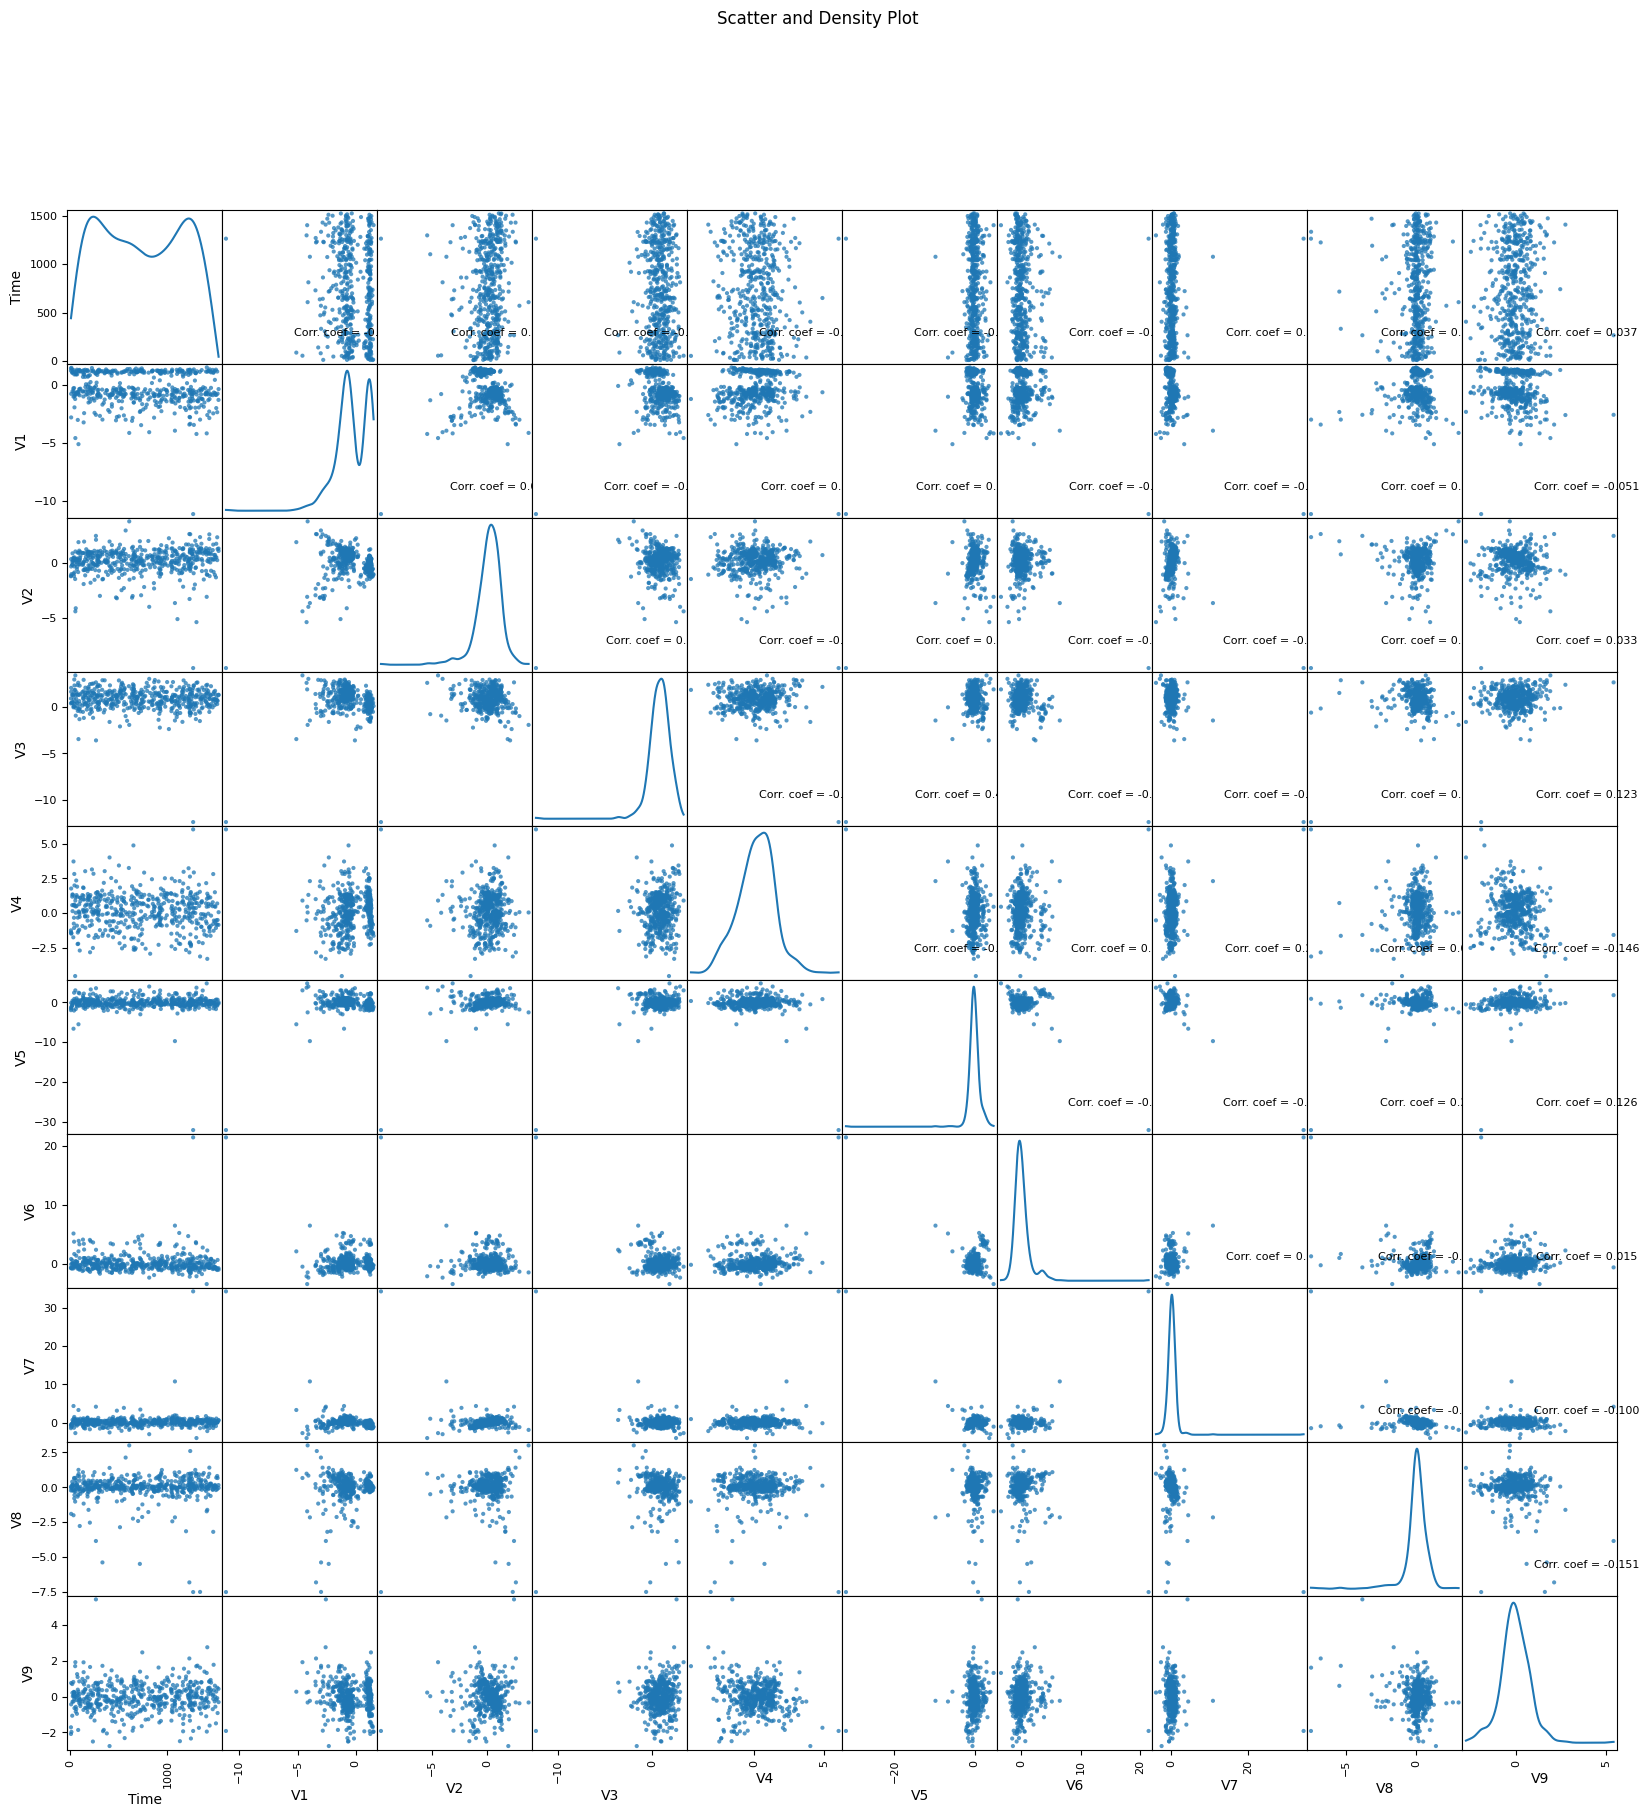

In [3]:
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

plotScatterMatrix(df, 20, 8)



4. **Hypothesis Testing:**
   - State any preexisting hypotheses about the data.
   - Explain methodologies to empirically test these hypotheses.

   **ANSWERS**

   - State any preexisting hypotheses about the data.


 Imbalance Hypothesis: Given that fraud detection datasets typically exhibit a high class imbalance, a preexisting hypothesis could be that the dataset contains significantly more non-fraudulent transactions than fraudulent ones. This hypothesis is supported by the initial analysis, which revealed a class imbalance issue in the 'Class' variable.

Feature Importance Hypothesis: Before conducting any analysis, one could hypothesize that certain features might be more important than others in predicting fraudulent transactions. Given that the dataset has undergone PCA transformation, a hypothesis could be that the principal components derived from PCA contain the most relevant information for detecting fraud.

Temporal Patterns Hypothesis: Since the dataset includes a 'Time' feature representing the time elapsed since the first transaction, one could hypothesize that there are temporal patterns in fraudulent activities. For example, fraudulent transactions might occur more frequently during certain times of the day or on specific days of the week.

Transaction Amount Hypothesis: Another hypothesis could be related to the transaction amount. One might speculate that fraudulent transactions tend to involve either very small or very large amounts compared to legitimate transactions. Exploring the distribution of transaction amounts could help validate or refute this hypothesis.

Outlier Hypothesis: Given the nature of financial transactions, it's reasonable to hypothesize that the dataset contains outliers, especially in the 'Amount' feature. These outliers could represent unusually large or small transactions that deviate significantly from the norm. Identifying and handling these outliers appropriately could improve the model's performance.

Correlation Hypothesis: There might be a hypothesis regarding the correlations between features and the target variable ('Class'). For example, one could hypothesize that certain principal components derived from PCA are positively or negatively correlated with fraudulent transactions.


- Explain methodologies to empirically test these hypotheses.


To empirically test the hypotheses formulated about the data, we can employ various methodologies that leverage statistical analysis, visualization techniques, and machine learning algorithms. Here are methodologies to test each hypothesis:

Imbalance Hypothesis:

Methodology: Calculate the class distribution of the 'Class' variable and visualize it using a bar plot or pie chart. Quantify the class imbalance ratio to understand the extent of the imbalance.
Statistical Testing: Perform a hypothesis test (e.g., Chi-square test) to determine if the class distribution significantly deviates from a balanced distribution.
Feature Importance Hypothesis:

Methodology: Use feature importance techniques such as information gain, Gini impurity, or permutation importance to quantify the importance of each feature in predicting the target variable. Plotting the feature importance scores can provide insights into which features are most relevant.
Machine Learning Approach: Train a machine learning model (e.g., Random Forest or Gradient Boosting) and analyze the model's feature importances. Features with higher importances are likely more important in predicting fraud.
Temporal Patterns Hypothesis:

Methodology: Visualize the distribution of fraudulent transactions over time using line plots or histograms. Analyze if there are any noticeable patterns, such as spikes or dips, at specific time intervals.
Statistical Testing: Perform time series analysis techniques, such as autocorrelation or seasonality analysis, to identify temporal patterns and trends in fraudulent activities.
Transaction Amount Hypothesis:

Methodology: Plot the distribution of transaction amounts separately for fraudulent and non-fraudulent transactions using histograms or density plots. Compare the distributions visually and calculate summary statistics (e.g., mean, median) for each group.
Statistical Testing: Perform hypothesis testing (e.g., t-test or Mann-Whitney U test) to determine if there is a statistically significant difference in transaction amounts between fraudulent and non-fraudulent transactions.
Outlier Hypothesis:

Methodology: Visualize the distribution of transaction amounts using box plots or scatter plots and identify any data points that fall outside the typical range. Calculate the z-scores or interquartile range (IQR) to quantify outliers.
Statistical Testing: Perform outlier detection techniques such as z-score method or IQR method to identify and remove outliers from the dataset.
Correlation Hypothesis:

Methodology: Compute the correlation coefficients (e.g., Pearson correlation or Spearman rank correlation) between each feature and the target variable ('Class'). Visualize the correlations using a heatmap or scatter plots.
Statistical Testing: Perform hypothesis testing to determine if the observed correlations are statistically significant. Use methods such as correlation significance testing or permutation tests.


5. **Handling Sparse/Dense Data and Outliers:**
   - Assess the density of the data.

To assess the density of the data, we need to examine the distribution of values within each feature. This can be done visually using histograms, kernel density estimation (KDE) plots, or through summary statistics such as mean, median, and standard deviation. Here's how we can assess the density of the data based on the screenshots and the dataset file:

Histograms and KDE Plots: We can generate histograms or KDE plots for each feature to visualize the distribution of values. These plots will show the frequency of different values or ranges of values within each feature.

Summary Statistics: Calculating summary statistics such as mean, median, and standard deviation can provide insights into the central tendency and spread of the data. For example, a high standard deviation indicates a wide spread of values, whereas a low standard deviation suggests a more concentrated distribution.

Box Plots: Box plots can also be useful for assessing the density of the data, especially in identifying outliers and the spread of values within each feature.

Pairwise Scatter Plots: Pairwise scatter plots can help visualize the relationships between different features and identify any patterns or clusters in the data.


   - Propose strategies to handle missing data and outliers while maintaining dataset integrity.

   Handling Missing Data:

Imputation: Fill missing values with a statistical measure such as mean, median, or mode. This approach can help preserve the overall distribution of the data.
Dropping: If missing values are minimal and do not significantly impact the dataset's integrity, dropping rows or columns with missing values may be appropriate.
Advanced Imputation Techniques: Use more sophisticated imputation methods such as K-nearest neighbors (KNN) imputation or predictive modeling to estimate missing values based on other features in the dataset.
Consideration of Missingness Mechanism: Understand the mechanism behind missing data (e.g., missing completely at random, missing at random, or missing not at random) to choose the most suitable imputation strategy.
Handling Outliers:

Visual Inspection: Plot box plots, histograms, or scatter plots to visually identify outliers. This allows for a qualitative assessment of extreme values.
Statistical Methods: Use statistical methods such as z-score, interquartile range (IQR), or Tukey's method to detect outliers quantitatively. Values outside a certain threshold based on these methods can be considered outliers.
Winsorization: Replace outliers with the nearest non-outlying value. This approach preserves the distribution of the data while mitigating the impact of extreme values.
Transformation: Apply mathematical transformations such as log transformation or square root transformation to make the distribution more symmetrical and reduce the impact of outliers.
Robust Estimators: Use robust statistical estimators that are less sensitive to outliers, such as the median instead of the mean for central tendency measures.
Maintaining Dataset Integrity:

Documentation: Document all steps taken to handle missing data and outliers to maintain transparency and reproducibility.
Sensitivity Analysis: Conduct sensitivity analyses to assess the robustness of results to different handling strategies for missing data and outliers.
Evaluate Model Performance: Evaluate the performance of machine learning models trained on datasets with different handling strategies to ensure that dataset integrity is not compromised.
Cross-validation: Use cross-validation techniques to assess model performance and generalization across different subsets of the data, ensuring that handling strategies do not introduce biases.



   **Insert code for Handling Sparse/Dense Data and Outliers below**

Data is dense


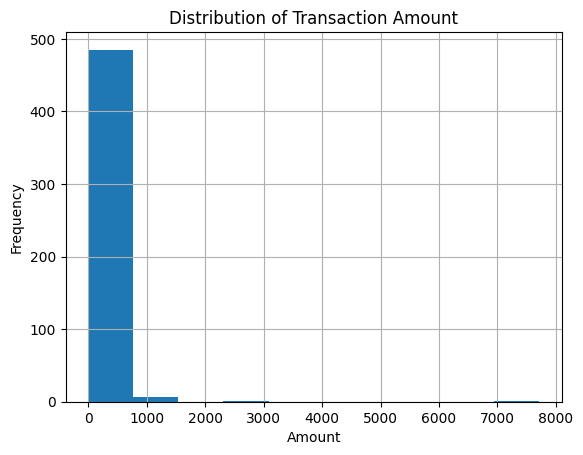

In [4]:
import pandas as pd
import numpy as np


# Handling Sparse/Dense Data
# Check density of DataFrame
density = df.isnull().mean().mean()  # Calculate the overall density of missing values
if density < 0.1:
    # If density is less than 10%, consider the data as dense
    print("Data is dense")
    # Handle missing data for dense data using imputation, dropping, or other methods

else:
    # If density is equal to or greater than 10%, consider the data as sparse
    print("Data is sparse")
    # Handle missing data for sparse data using sparse data-specific techniques

# Handling Outliers
# Visual Inspection
# Assuming 'Amount' is the column with potential outliers
df['Amount'].hist()  # Visualize the distribution using a histogram
plt.title('Distribution of Transaction Amount')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Statistical Methods
# Calculate z-scores to detect outliers
z_scores = (df['Amount'] - df['Amount'].mean()) / df['Amount'].std()
outliers = df[(z_scores > 3) | (z_scores < -3)]  # Define outliers based on z-score threshold

# Winsorization
# Assuming 'Amount' is the column with potential outliers
q_low = df['Amount'].quantile(0.01)  # Define lower quantile
q_high = df['Amount'].quantile(0.99)  # Define upper quantile
df['Amount'] = np.where(df['Amount'] < q_low, q_low, df['Amount'])  # Replace outliers with lower quantile
df['Amount'] = np.where(df['Amount'] > q_high, q_high, df['Amount'])  # Replace outliers with upper quantile

# Transformation
# Log transformation to reduce skewness
df['Amount'] = np.log1p(df['Amount'])

# Robust Estimators
# Using median instead of mean to calculate central tendency
median_amount = df['Amount'].median()


6. **Data Splitting:**
   - Define a methodology to split the dataset into training, validation, and testing sets.

Load the Dataset:

Load the dataset file into a DataFrame, assuming it contains all the necessary features and the target variable.
Randomize Data:

Randomize the order of samples in the dataset to prevent any inherent ordering bias. This can be achieved by shuffling the DataFrame using a random seed to ensure reproducibility.
Define Split Ratios:

Define the proportion of data to allocate to each split. For example:
Training set: 70% of the data
Validation set: 15% of the data
Testing set: 15% of the data
Split Dataset:

Use stratified sampling (if dealing with imbalanced classes) to ensure that each split maintains the same class distribution as the original dataset.
Split the dataset into training, validation, and testing sets based on the defined ratios. Ensure that samples are not duplicated across splits, i.e., each sample belongs to only one split.
Save Split Datasets:

Save the split datasets into separate files or store them as separate DataFrames for further processing.
Document the splitting methodology used, including the random seed and split ratios, to ensure reproducibility and transparency in model development and evaluation.

   - Ensure randomness and representativeness in each subset.

Randomization:

Shuffle the dataset before splitting to ensure that the order of samples does not bias the splits. This randomization prevents any inherent patterns or structures in the dataset from influencing the splits.
Set a random seed when shuffling the dataset to ensure reproducibility.
Stratified Sampling:

Use stratified sampling, especially if dealing with imbalanced classes, to maintain the same class distribution in each subset as the original dataset. This ensures that each subset is representative of the overall dataset in terms of class proportions.
Stratified sampling helps prevent bias in the model training process by ensuring that each class is adequately represented in all subsets.
Proportional Splitting:

Define split ratios that maintain the overall proportions of the dataset. For example, if the dataset contains 70% non-fraudulent transactions and 30% fraudulent transactions, the split ratios should preserve these proportions in each subset.
Adjust the split ratios based on the class distribution to ensure that each subset accurately represents the distribution of classes in the original dataset.
Cross-Validation (Optional):

Consider using k-fold cross-validation on the training set to further ensure randomness and representativeness. This technique divides the training set into k subsets (folds), ensuring that each fold maintains the same class distribution as the original dataset.
Cross-validation helps assess model performance and generalization across different subsets of the data, providing a more robust evaluation of the model.

7. **Bias Mitigation:**
   - Implement techniques to identify and mitigate biases in the dataset.
   - Ensure fairness and equity in data representation.
   
    *answer:


    1. Identifying Biases

a. Data Exploration and Visualization:
Conduct thorough exploratory data analysis (EDA) to understand the distributions of features and target variables. Visualizations like histograms, box plots, and scatter plots can help identify imbalances or anomalies in the data distribution.

b. Statistical Analysis:
Perform statistical tests to check for associations between features and the target variable across different groups. For instance, check if certain demographics are more likely to be labeled as high-risk unfairly.

c. Correlation Analysis:
Analyze correlations between features and the target variable, focusing on detecting any indirect biases that might be present due to proxy variables.

2. Mitigating Biases

a. Data Collection and Preprocessing:
Diverse Data Collection: Ensure the dataset covers a broad spectrum of the population to reduce sampling bias.

Feature Selection: Carefully select features to exclude those that directly or indirectly introduce bias.

Handling Imbalanced Data: Use techniques like oversampling, undersampling, or SMOTE (Synthetic Minority Over-sampling Technique) to address class imbalance.

b. Algorithmic Interventions:

Fairness-aware Modeling: Implement models that incorporate fairness criteria, such as demographic parity or equality of opportunity, into their optimization process.

Regularization Techniques: Apply regularization methods to penalize biases in model parameters.

c. Post-modeling Bias Mitigation:

Fairness Metrics Evaluation: After model training, evaluate fairness metrics (e.g., disparate impact, false positive rate difference) to assess bias.

Outcome Re-balancing: Adjust decision thresholds for different groups to equalize outcomes.

Model Interpretation and Explanation: Use interpretability tools to understand how model predictions are made, ensuring transparency and accountability.

3. Continuous Monitoring and Evaluation
Regularly monitor the model's performance and fairness metrics once deployed, adjusting as necessary when new data becomes available or when the population distribution changes.
Engage with stakeholders, including affected communities, to gather feedback on model outcomes and perceptions of fairness.

4. Legal and Ethical Considerations
Stay informed on legal standards and ethical guidelines related to AI and data usage in your jurisdiction. Compliance with laws such as GDPR in Europe or CCPA in California, which include provisions for fairness and non-discrimination, is crucial.

5. Documentation and Reporting
Maintain detailed documentation of the dataset, model development process, bias mitigation efforts, and periodic evaluations. Transparency in how biases were addressed is key to building trust and ensuring accountability.



8. **Features for Model Training:**
   - Identify relevant features for training the model.
   - Rank features based on their significance to project objectives.

 **Your answer for features must be plotted/ show your working code-wise **

 answers:

   Identifying Relevant Features
Understand the Data: Review all available features in the dataset. In the case of credit card transactions, typical features include transaction amount, time, and anonymized parameters that might encapsulate aspects like merchant details, user behavior, and more.

Data Preprocessing: Ensure the data is clean, handle missing values, and encode categorical variables if present.

Statistical Analysis: Conduct a statistical analysis to see which features vary significantly with respect to the target variable, which in this case is the class indicating fraud or no fraud.

Correlation Analysis: Check for correlations between features and the target variable. Highly correlated features might be more relevant for training the model.

Ranking Features Based on Significance
Feature Importance from Models: Train a model (like RandomForest or Gradient Boosting) that can provide feature importances as part of their output. The importance can indicate how much each feature contributes to the model’s prediction.

Recursive Feature Elimination: Use methods like RFE to recursively remove the least important features and see how the model performance is affected.

Model Coefficients: If using linear models or models that provide coefficients (like Logistic Regression), the magnitude of the coefficients can indicate feature importance.

9. **Types of Data Handling:**
   - Classify the types of data (categorical, numerical, etc.) present in the dataset.
   - Plan preprocessing steps for each data type.

   [**insert text for preprocessing steps**]

  Numerical Data: This can be either discrete or continuous. Transaction amounts, time elapsed since the first transaction, and anonymized numerical features (like V1-V28 in the dataset) are examples of numerical data.

Preprocessing Steps for Each Data Type



Numerical Data:
Standardization: Scale the features so they have a mean of 0 and a standard deviation of 1. This is especially important for features that go into neural network models or distance-based algorithms.
  

In [ ]:
#print out relevant features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_numerical = scaler.fit_transform(X_numerical)


Normalization: Scale the features to a range, such as between 0 and 1, if required by the model or to maintain consistency across features.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_numerical = scaler.fit_transform(X_numerical)


Handling Outliers: Depending on the nature of the dataset, you may want to handle outliers to prevent them from skewing the model. Techniques include trimming, winsorizing, or using robust scalers.

In [ ]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
X_numerical = scaler.fit_transform(X_numerical)


Missing Values: Handle missing data by imputation or removal, depending on the extent and nature of the missingness.

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')  # or median, most_frequent
X = imputer.fit_transform(X)


Feature Engineering: Create new features that might capture the dynamics of fraud better, like the time since the last transaction for a given card or user.

Feature Selection: Use model-based, iterative, or statistical methods to reduce the feature space to the most informative features.

[insert text for preprocessing steps]


For preprocessing the numerical data, we will first apply a standard scaler to normalize their scale. It's crucial for our neural network model to receive data that's on the same scale. We'll also carefully handle outliers to ensure they do not distort our model's performance.

If there were categorical features, we'd use one-hot encoding to transform them into a numerical format that's understandable by our models. In case of high cardinality in categorical variables, we'd apply dimensionality reduction techniques.

Finally, we will impute any missing values using the mean for continuous variables and the mode for categorical ones. Additional feature engineering steps will be taken to create new features that can potentially help in better distinguishing between fraudulent and non-fraudulent transactions. Throughout the modeling process, we'll engage in feature selection to refine our feature set for optimal model performance


10. **Data Transformation for Modeling:**
    - Specify methods for transforming raw data into a model-friendly format.
    - Detail steps for normalization, scaling, or encoding categorical variables.

To transform raw data into a format that's amenable to model training, we apply a series of preprocessing steps tailored to the type of data we're dealing with. The goal is to convert the raw data into a feature matrix (X) and a target vector (y) that a machine learning model can understand and learn from.

Here are detailed steps for normalizing, scaling, and encoding data, which are essential parts of data transformation for modeling:

Normalization
Normalization adjusts the scale of your data so that it fits within a specific range, typically 0 to 1, which can be particularly useful for algorithms that weigh inputs like neural networks or methods that use distance calculations like k-nearest neighbors.

Scaling
Scaling alters the distribution of data to have a mean of zero and a standard deviation of one. It's useful for algorithms that assume the data is centered around zero.




11. **Data Storage:**
    - Determine where and how processed data will be stored.
    - Choose suitable storage solutions ensuring accessibility and security.


When choosing where and how to store processed data for machine learning purposes, several factors must be considered, including accessibility, security, scalability, performance, and cost. Here's how you might plan for data storage:

Storage Location:
Local Storage:
If you're working in a secure environment with no need for sharing or collaboration, local storage can be an option. However, it may not be the most scalable or secure solution.

Cloud Storage:
Cloud storage solutions like AWS S3, Google Cloud Storage, or Azure Blob Storage are popular choices. They offer high availability, durability, scalability, and ease of access.

Databases:
Relational databases such as PostgreSQL, MySQL, or cloud-based solutions like Amazon RDS for structured data.
NoSQL databases like MongoDB, Cassandra, or Google Firestore for unstructured or semi-structured data, when flexibility is needed.

Data Warehouses:
For large datasets that require complex queries or are used across different teams, data warehouses like Amazon Redshift, Google BigQuery, or Snowflake are suitable.
Storage Format:

File Formats:
CSV or TSV for simplicity and portability.
Binary formats like Apache Parquet or HDF5 for efficient storage of large datasets.

Data Lakes:
If working with a mix of structured, semi-structured, and unstructured data, a data lake might be appropriate. It allows you to store vast amounts of raw data in its native format until it's needed.
Security and Accessibility:

Security:
Data should be encrypted in transit and at rest. Use built-in encryption features of databases or storage services.
Implement proper access controls. Only authorized users should have access to the data, using identity and access management (IAM) policies.

Backup and Recovery:
Regularly back up your data to ensure that you can recover from data loss.
Consider using cloud storage solutions that provide automated backup and versioning.

Compliance:
Ensure that the data storage solution complies with relevant regulations such as GDPR, HIPAA, or CCPA.

Practical Implementation:
Preprocessing: Once the data is preprocessed and ready to be stored,
Convert it to a suitable format (like Parquet for columnar storage or a database format).
Encrypt the data if required.

Upload:
Upload the data to the chosen storage solution (e.g., AWS S3, using secure transfer methods).

Database Insertion (if using databases):
Insert the data into the database through batch inserts or an ETL process.

Access Setup:
Configure IAM roles and policies to control access to the data.
Setup API endpoints if the data needs to be accessed programmatically.
---

#### Notes:
- This template provides a structured framework for documenting your data processing approach for the portfolio project.
- Fill out each section with specific details relevant to your project's requirements and objectives.
- Use additional cells as needed to provide comprehensive information.